In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import umap
%matplotlib inline
datafile = 'dataset4.tpm.txt'
df = pd.read_csv(datafile, sep='\t')

In [2]:
df = df.set_index('gene_name')
cells = list(df.columns.values)

In [3]:
mat = np.array(df)
per_cell_sum = mat.sum(axis=1)
per_gene_sum = mat.sum(axis=0)
low_expr_thr = 5000
high_expr_thr = 80000000
mat = mat[:, (per_gene_sum>=low_expr_thr) & (per_gene_sum<=high_expr_thr)]
mean_exp = mat.mean(axis=0)
std_exp = np.sqrt(mat.std(axis=0))
CV = std_exp/mean_exp
mat = mat[:, CV >= 0.6]
cells_expression = mat.sum(axis=1)
mat = mat[cells_expression>=100, :]
mat = np.log(mat+1)
df = pd.DataFrame(mat,index=mat[:,0])

In [4]:
def dendrogrammer(df, leaf_labels):
    D = df.values
    if len(leaf_labels) != len(D):
        D = np.transpose(D)
    Z = linkage(D, method='ward', metric='euclidean')
    plt.figure(figsize=(10, 10))
    ax = plt.subplot()
    plt.subplots_adjust(left=0.07, bottom = 0.3, right = 0.98, top = 0.95, wspace=0, hspace=0)
    plt.xlabel('Cell Line')
    plt.ylabel('Distance')
    
    dendrogram(Z, leaf_rotation=90., leaf_font_size=10., labels = leaf_labels)
    plt.savefig('dataset4dend.png')

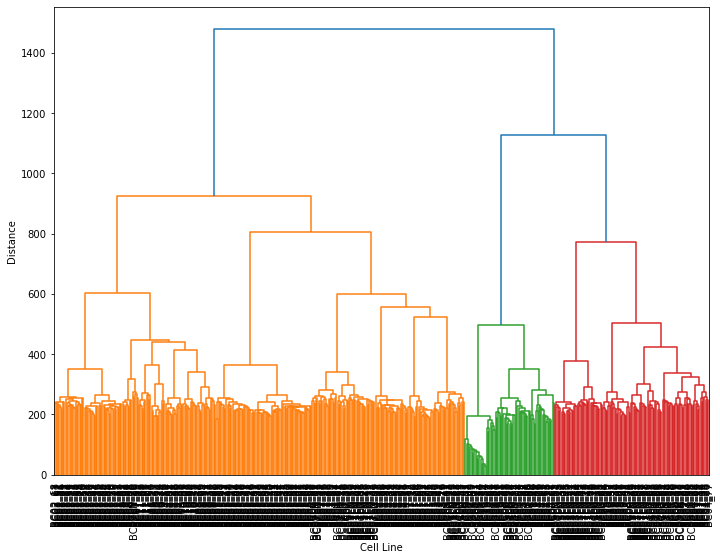

In [5]:

dendrogrammer(df, cells)

In [6]:
def PCAer(df):
 D = df.values
 D = np.transpose(D)
 pca = PCA(n_components= 90)
 pca.fit(D)
 projected = pca.fit_transform(D)
 return projected

In [7]:
from sklearn.cluster import KMeans
Dpc = PCAer(df)
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(Dpc)
labels = kmeans.predict(Dpc)
C = kmeans.cluster_centers_
out = [Dpc, labels, C]
[proj, labels, centroids] = out
true_coords = {}
true_cells = {}
true_labels = {}
print(np.bincount(kmeans.labels_))
for i in range(len(Dpc)):
    coords = str(proj[i:i+1,0]) + " " + str(proj[i+1:i+2,1]) + " " + str(proj[ i+2:i+3,2])
    print(coords)
    true_cells.update({str(coords).strip():labels[i]})
    true_labels.update({cells[i]:labels[i]})
    true_coords.update({cells[i]:str(coords).strip()})
print(true_coords)
print(true_cells)
'''def kmeanser(df, k): 
    Dpc = PCAer(df)
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(Dpc)
    labels = kmeans.predict(Dpc)
    C = kmeans.cluster_centers_
    out = [Dpc, labels, C]
    print(np.bincount(kmeans.labels_))
    return out'''

[ 77 214  78 149]
[-79.83416993] [-0.17389939] [8.76796895]
[-94.37444114] [-8.90694524] [0.69858271]
[-64.12318021] [-20.78494095] [-4.22515957]
[-64.89833688] [-10.10957689] [5.75146091]
[-81.84729632] [-22.1046608] [-1.69461717]
[-67.40017721] [-26.07637367] [-3.82892592]
[-83.87682299] [-20.1650117] [-5.11006845]
[-45.67692219] [-18.20136546] [1.55391498]
[-78.35222738] [-23.80946773] [8.69850034]
[-67.76157618] [-21.57629462] [3.69551772]
[-81.2647238] [-20.51281924] [-12.98445894]
[-77.29354853] [-22.08403792] [11.24434615]
[-63.74204138] [-19.92719848] [10.37579653]
[-60.59238875] [-21.19438018] [-0.00782709]
[-70.80946505] [-22.64198511] [11.84372948]
[-61.89117938] [-23.00980675] [28.17248034]
[-50.637679] [-29.00504376] [1.95149943]
[60.5646972] [-21.87686088] [-0.76147703]
[-59.23542524] [-22.70595998] [7.42009219]
[-60.41065816] [-16.74516023] [-38.638704]
[-94.10607356] [-1.39813016] [-28.41653391]
[-69.041537] [-22.64984074] [-14.70383776]
[44.36807616] [-19.10137232] [-4

[-58.6248942] [-43.550305] [51.90022905]
[-67.44849701] [-23.14797796] [46.16613473]
[-91.65881493] [-43.84557154] [47.21216223]
[-45.70275816] [-39.74338167] [44.52339592]
[-71.74364347] [-42.86270006] [51.9972496]
[-55.8073831] [-41.06609394] [42.51927544]
[-37.87676572] [-45.08159011] [47.54413059]
[-43.66807103] [-43.36844506] [48.45796949]
[-39.33991733] [-45.36164462] [49.32128588]
[-26.06222549] [-38.33567074] [54.08364238]
[-82.63142294] [-21.77357713] [45.79431504]
[-74.79576204] [-28.40393246] [44.40412966]
[-40.58449587] [-38.9095368] [50.6660493]
[-68.22256002] [-44.19813769] [52.76445936]
[-46.80736471] [-42.71956322] [46.25332509]
[-63.53667119] [-35.08574095] [47.60208989]
[-45.13930657] [-35.57185811] [50.95169307]
[-73.9741625] [-36.89201413] [44.31404031]
[-81.88604863] [-29.179305] [46.6735528]
[-28.74582211] [-45.81340843] [44.67390649]
[-47.64781065] [-33.42955123] [43.76989572]
[-45.11723099] [-44.00506427] [52.25000483]
[-9.89345624] [-34.82410838] [35.61462283]


'def kmeanser(df, k): \n    Dpc = PCAer(df)\n    kmeans = KMeans(n_clusters=k)\n    kmeans = kmeans.fit(Dpc)\n    labels = kmeans.predict(Dpc)\n    C = kmeans.cluster_centers_\n    out = [Dpc, labels, C]\n    print(np.bincount(kmeans.labels_))\n    return out'

In [ ]:
#[proj, labels, centroids] = out

In [8]:
def DataCollection(algorithm, cluster_1, cluster_2, cluster_3, cluster_4, results):
     
    labels = true_labels
    
    num1 = []
    num2 = []
    num3 = []
    num4 = []
    barcodes1 = {}
    barcodes2 = {}
    barcodes3 = {}
    barcodes4 = {}
    truthnum1 = {}
    
    for i in labels:
        if labels[i] == 0:
            barcodes1.update({i:labels[i]})
        elif labels[i] == 1:
            barcodes2.update({i:labels[i]})
        elif labels[i] == 2:
            barcodes3.update({i:labels[i]})
        else:
            barcodes4.update({i:labels[i]})
            
    with open(cluster_1, 'w') as filehandle:
        for listitem in barcodes1:
            filehandle.write('%s\n' % listitem)
    with open(cluster_2, 'w') as filehandle:
        for listitem in barcodes2:
            filehandle.write('%s\n' % listitem)
    with open(cluster_3, 'w') as filehandle:
        for listitem in barcodes3:
            filehandle.write('%s\n' % listitem)
    with open(cluster_4, 'w') as filehandle:
        for listitem in barcodes4:
            filehandle.write('%s\n' % listitem)
        
        
    dp = open('DPCells.txt').readlines()
    dp_line = []
    for lines in dp:
        dp_line.append(lines)
    erp = open('ERPCells.txt').readlines()
    erp_line = []
    for lines in erp:
        erp_line.append(lines)
    her2p = open('HER2PCells.txt').readlines()
    her2p_line = []
    for lines in her2p:
        her2p_line.append(lines)
        
    tnbc = open('TNBCCells.txt').readlines()
    tnbc_line = []
    for lines in tnbc:
        tnbc_line.append(lines)
        
    res = open(results, "w")

    dpcount = 0
    erpcount = 0
    her2pcount = 0
    tnbccount = 0

    dpcount2 = 0
    erpcount2 = 0
    her2pcount2 = 0
    tnbccount2 = 0
    
    dpcount3 = 0
    erpcount3 = 0
    her2pcount3 = 0
    tnbccount3 = 0
    
    dpcount4 = 0
    erpcount4 = 0
    her2pcount4 = 0
    tnbccount4 = 0

    
    cluster1 = open(cluster_1).readlines()
    cluster1_line = []
    for lines in cluster1:
        cluster1_line.append(lines)
    for i in cluster1_line:
        for j in dp_line:
            if i == j:
                dpcount = dpcount + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'red'})
    res.write("DP Count Cluster 1: \n")
    res.write(str(dpcount/(len(cluster1_line))) + " \n")
    res.write(str(dpcount) + " \n")
    for x in cluster1_line:
        for y in erp_line:
            if x == y:
                erpcount = erpcount + 1
                truthnum1.update({true_coords[x[0:len(x)-1]]:'red'})
    res.write("ERP Count Cluster 1: \n")
    res.write(str(erpcount/(len(cluster1_line))) + "\n")
    res.write(str(erpcount) + "\n")
    for i in cluster1_line:
        for j in her2p_line:
            if i == j:
                her2pcount = her2pcount + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'red'})
    res.write("HER2P Count Cluster 1: \n")
    res.write(str(her2pcount/(len(cluster1_line))) + "\n")
    res.write(str(her2pcount) + "\n")
    for i in cluster1_line:
        for j in tnbc_line:
            if i == j:
                tnbccount = tnbccount + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'black'})
    res.write("TNBC Count Cluster 1: \n")
    res.write(str(tnbccount/(len(cluster1_line))) + "\n")
    res.write(str(tnbccount) + "\n")
    res.write("\n")
    

    cluster2 = open(cluster_2).readlines()
    cluster2_line = []
    for lines in cluster2:
        cluster2_line.append(lines)
    for i in cluster2_line:
        for j in dp_line:
            if i == j:
                dpcount2 = dpcount2 + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'red'})
    res.write("DP Count Cluster 2:" + "\n")
    res.write(str(dpcount2/(len(cluster2_line))) + "\n")
    res.write(str(dpcount2) + "\n")
    for i in cluster2_line:
        for j in erp_line:
            if i == j:
                erpcount2 = erpcount2 + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'black'})
    res.write("ERP Count Cluster 2:" + "\n")
    res.write(str(erpcount2/(len(cluster2_line))) + "\n")
    res.write(str(erpcount2) + "\n")
    for i in cluster2_line:
        for j in her2p_line:
            if i == j:
                her2pcount2 = her2pcount2 + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'red'})
    res.write("HER2P Count Cluster 2: \n")
    res.write(str(her2pcount2/(len(cluster2_line))) + "\n")
    res.write(str(her2pcount2) + "\n")
    for i in cluster2_line:
        for j in tnbc_line:
            if i == j:
                tnbccount2 = tnbccount2 + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'red'})
    res.write("TNBC Count Cluster 2: \n")
    res.write(str(tnbccount2/(len(cluster2_line))) + "\n")
    res.write(str(tnbccount2) + "\n")
    res.write("\n")
    

    cluster3 = open(cluster_3).readlines()
    cluster3_line = []
    for lines in cluster3:
        cluster3_line.append(lines)
    for i in cluster3_line:
        for j in dp_line:
            if i == j:
                dpcount3 = dpcount3 + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'red'})
    res.write("DP Count Cluster 3:" + "\n")
    res.write(str(dpcount3/(len(cluster3_line))) + "\n")
    res.write(str(dpcount3) + "\n")
    for i in cluster3_line:
        for j in erp_line:
            if i == j:
                erpcount3 = erpcount3 + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'red'})
    res.write("ERP Count Cluster 3:" + "\n")
    res.write(str(erpcount3/(len(cluster3_line))) + "\n")
    res.write(str(erpcount3) + "\n")
    for i in cluster3_line:
        for j in her2p_line:
            if i == j:
                her2pcount3 = her2pcount3 + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'black'})
    res.write("HER2P Count Cluster 3:" + "\n")
    res.write(str(her2pcount3/(len(cluster3_line))) + "\n")
    res.write(str(her2pcount3) + "\n")
    for i in cluster3_line:
        for j in tnbc_line:
            if i == j:
                tnbccount3 = tnbccount3 + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'red'})
    res.write("TNBC Count Cluster 3:" + "\n")
    res.write(str(tnbccount3/(len(cluster3_line))) + "\n")
    res.write(str(tnbccount3) + "\n")
    res.write("\n")
    
    cluster4 = open(cluster_4).readlines()
    cluster4_line = []
    for lines in cluster4:
        cluster4_line.append(lines)
    for i in cluster4_line:
        for j in dp_line:
            if i == j:
                dpcount4 = dpcount4 + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'black'})
    res.write("DP Count Cluster 4:" + "\n")
    res.write(str(dpcount4/(len(cluster4_line))) + "\n")
    res.write(str(dpcount4) + "\n")
    for i in cluster4_line:
        for j in erp_line:
            if i == j:
                erpcount4 = erpcount4 + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'red'})
    res.write("ERP Count Cluster 4:" + "\n")
    res.write(str(erpcount4/(len(cluster4_line))) + "\n")
    res.write(str(erpcount4) + "\n")
    for i in cluster4_line:
        for j in her2p_line:
            if i == j:
                her2pcount4 = her2pcount4 + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'red'})
    res.write("HER2P Count Cluster 4:" + "\n")
    res.write(str(her2pcount4/(len(cluster4_line))) + "\n")
    res.write(str(her2pcount4) + "\n")
    for i in cluster4_line:
        for j in tnbc_line:
            if i == j:
                tnbccount4 = tnbccount4 + 1
                truthnum1.update({true_coords[i[0:len(i)-1]]:'red'})
    res.write("TNBC Count Cluster 4:" + "\n")
    res.write(str(tnbccount4/(len(cluster4_line))) + "\n")
    res.write(str(tnbccount4) + "\n")
    res.write("\n")
    
    print(len(truthnum1))
    return truthnum1

DataCollection(kmeans, 'kmeans_cluster1.txt', 'kmeans_cluster2.txt', 'kmeans_cluster3.txt', 'kmeans_cluster4.txt','kmeans_results.txt')

508


{'[33.90167003] [-7.19656554] [-23.56565797]': 'red',
 '[13.9251487] [-4.94585303] [28.86601397]': 'red',
 '[-59.65347732] [-5.58745591] [1.22898613]': 'red',
 '[-25.52935666] [-9.57466858] [-0.17736509]': 'red',
 '[-15.41307888] [40.67003155] [10.07057502]': 'red',
 '[40.71008109] [29.97525967] [25.46729955]': 'red',
 '[-98.15649578] [101.15710727] [-20.42271462]': 'red',
 '[-62.29675202] [-3.27567253] [14.31604556]': 'red',
 '[-62.138643] [95.23333874] [27.14157333]': 'red',
 '[-10.6086569] [97.06132784] [31.1721134]': 'red',
 '[-58.1135105] [102.57341817] [30.80919785]': 'red',
 '[-40.08397635] [114.00133586] [4.66691401]': 'red',
 '[-53.48130103] [45.6812093] [35.30481364]': 'red',
 '[-46.59766515] [116.6645524] [-4.017783]': 'red',
 '[-55.65246215] [6.59637008] [-16.83294303]': 'red',
 '[-68.67592337] [23.23360372] [3.03821527]': 'red',
 '[-40.54449737] [102.74852969] [31.76505726]': 'red',
 '[-11.92649949] [112.2184134] [-31.32403561]': 'red',
 '[-78.40098407] [16.61837087] [20.7

508


KeyError: '[42.30324876] [-10.73632877] [-13.36595986]'

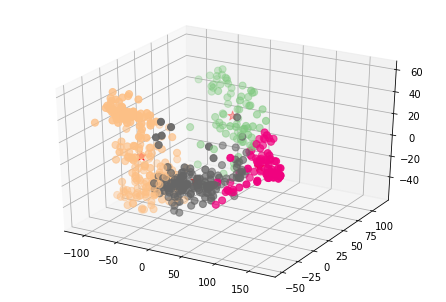

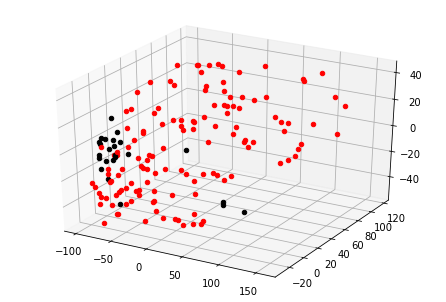

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1 = Axes3D(fig1)
[proj, labels, centroids] = out
ax1.scatter(proj[:,0], proj[:, 1], proj[:, 2], c=labels, s=50, cmap='Accent')

colors = DataCollection(kmeans, 'kmeans_cluster1.txt', 'kmeans_cluster2.txt', 'kmeans_cluster3.txt', 'kmeans_cluster4.txt','kmeans_results.txt')
ax1.scatter(centroids[:,0], centroids[:, 1], centroids[:,2], c = 'red', s=100, marker='*', cmap='Accent')
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2 = Axes3D(fig2)
for i in range(len(proj)):
    coords = str(proj[i:i+1,0]) + " " + str(proj[i+1:i+2,1]) + " " + str(proj[ i+2:i+3,2])
    ax2.scatter(proj[i:i+1, 0], proj[i+1:i+2, 1], proj[i+2:i+3, 2], c=colors[coords])


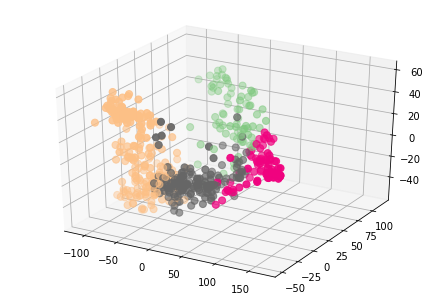

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1 = Axes3D(fig1)

ax1.scatter(proj[:,0], proj[:, 1], proj[:, 2], c=labels, s=50, cmap='Accent')

ax1.scatter(centroids[:,0], centroids[:, 1], centroids[:,2], c = 'white', s=100, marker='*', cmap='Accent')
plt.savefig('3ddataset4.png')

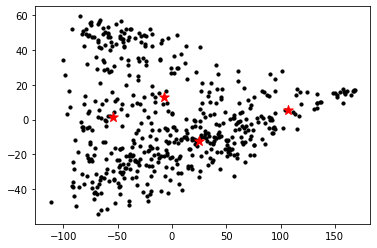

In [11]:
plt.scatter(proj[:,0], proj[:,2], s=10.0, color='black')
plt.scatter(centroids[:,0], centroids[:, 2], c = 'red', s = 100, marker='*', cmap='Accent')

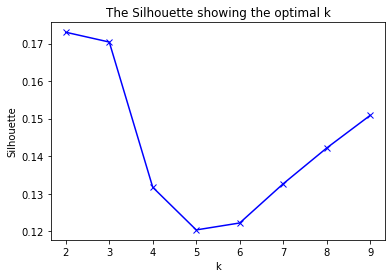

In [12]:
from sklearn.metrics import silhouette_score
K = range(2, 10)
sil = []
Dpc = PCAer(df)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(Dpc)
    labels = kmeans.predict(Dpc)
    sil.append(silhouette_score(Dpc, labels))
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('The Silhouette showing the optimal k')
plt.show()

In [ ]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis = 1))/df.shape[0])

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('elbow4.png')
plt.show()
